# Training logs for min move strategy

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir('../logs')

## 0-200 games
Generated 200 games using fixed LUDR move order.

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 60, 'lr': 0.01, 'batch_size': 1024, 'pretrained': None}


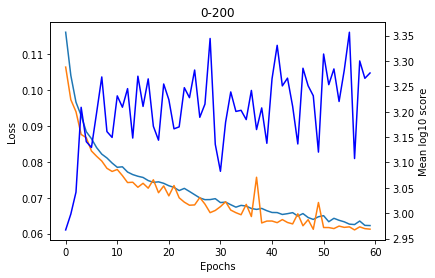

In [2]:
logs0 = np.load('20200119/20_200_c32b5_lr0.01.npz', allow_pickle=True)
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
epochs = np.arange(len(t_loss0))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.set_title('0-200')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.show()

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 60, 'lr': 0.01, 'batch_size': 1024, 'pretrained': None}


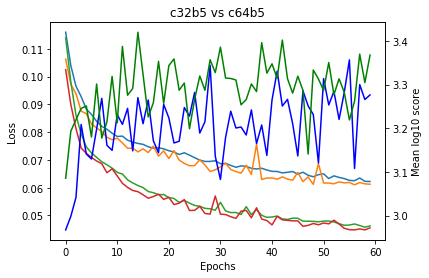

In [11]:
logs0 = np.load('20200119/20_200_c32b5_lr0.01.npz', allow_pickle=True)
logs1 = np.load('20200119/20_200_c64b5_lr0.01.npz', allow_pickle=True)
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
scores1 = logs1['log_scores']
epochs = np.arange(len(t_loss0))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.plot(epochs, t_loss1, epochs, v_loss1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.plot(epochs, scores1, color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.title('c32b5 vs c64b5')
plt.show()

Wider network has more capacity and performs better. Surprisingly, there was no impact on training speed using these wider networks.

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 60, 'lr': 0.01, 'batch_size': 1024, 'channels': 128, 'blocks': 5, 'pretrained': None}


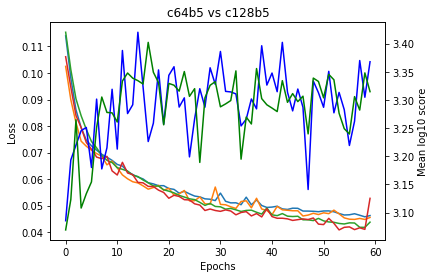

In [12]:
logs0 = np.load('20200119/20_200_c64b5_lr0.01.npz', allow_pickle=True)
logs1 = np.load('20200119/20_200_c128b5_lr0.01.npz', allow_pickle=True)
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
scores1 = logs1['log_scores']
epochs = np.arange(len(t_loss0))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.plot(epochs, t_loss1, epochs, v_loss1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.plot(epochs, scores1, color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.title('c64b5 vs c128b5')
plt.show()

c128 no better than c64. Performance seems to plateau around 15 epochs.

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 40, 'lr': 0.01, 'batch_size': 1024, 'channels': 64, 'blocks': 5, 'pretrained': None}


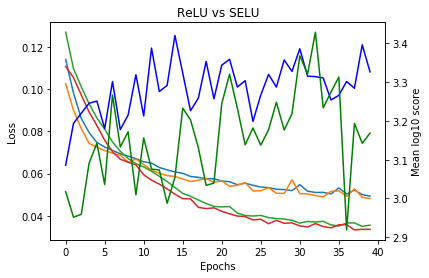

In [4]:
logs0 = np.load('20200120/20_200_c64b5_lr0.01.npz', allow_pickle=True)
logs1 = np.load('20200120/selu20_200_c64b5_lr0.01.npz', allow_pickle=True)
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
scores1 = logs1['log_scores']
epochs = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.plot(epochs1, t_loss1, epochs1, v_loss1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.plot(epochs1, scores1, color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.title('ReLU vs SELU')
plt.show()

Scaling input tiles from 0-15 to 0-1 actually makes network worse. SELU improved loss but policy was worse (overfitting?).

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 40, 'lr': 0.01, 'batch_size': 1024, 'channels': 64, 'blocks': 5, 'pretrained': None}


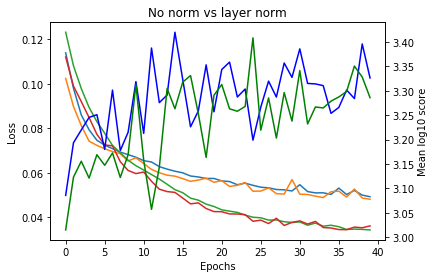

In [5]:
logs0 = np.load('20200120/20_200_c64b5_lr0.01.npz', allow_pickle=True)
logs1 = np.load('20200120/LN_20_200_c64b5_lr0.01.npz', allow_pickle=True)
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
scores1 = logs1['log_scores']
epochs = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.plot(epochs1, t_loss1, epochs1, v_loss1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.plot(epochs1, scores1, color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.title('No norm vs layer norm')
plt.show()

Adding layer normalization also improves loss, but with only a slight cost to playing strength. However, eval is slower.

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 40, 'lr': 0.01, 'batch_size': 1024, 'channels': 64, 'blocks': 5, 'pretrained': None}


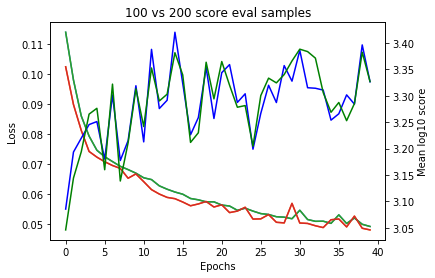

In [6]:
logs0 = np.load('20200120/20_200_c64b5_lr0.01.npz', allow_pickle=True)
logs1 = np.load('20200120/more_samples_20_200_c64b5_lr0.01.npz', allow_pickle=True)
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
scores1 = logs1['log_scores']
epochs = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.plot(epochs1, t_loss1, epochs1, v_loss1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.plot(epochs1, scores1, color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.title('100 vs 200 score eval samples')
plt.show()

Training seems to be deterministic despite RNG being used more to generate new games. Perhaps this is because the `torch` and `random` RNG engines are separate? Once the `torch` seed is set, all training operations are deterministic. Generating games uses the `random` RNG. Using 2x more samples slightly improves smoothness of eval. It shows that network was still improving at epoch 30. It also shows that the movements in eval are due to the network not the random nature of the game.

If I believe in these evals, I can use it for a variable stopping and save only the network that gave the highest eval.

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 40, 'lr': 0.01, 'batch_size': 512, 'channels': 64, 'blocks': 5, 'pretrained': None}


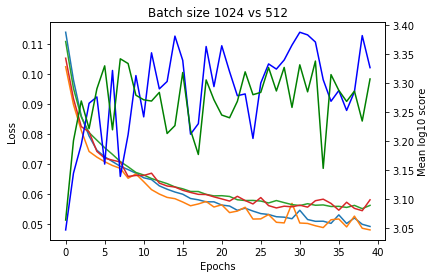

In [9]:
logs0 = np.load('20200120/more_samples_20_200_c64b5_lr0.01.npz', allow_pickle=True)
logs1 = np.load('20200120/ms_bs512_20_200_c64b5_lr0.01.npz', allow_pickle=True)
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
scores1 = logs1['log_scores']
epochs = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.plot(epochs1, t_loss1, epochs1, v_loss1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.plot(epochs1, scores1, color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.title('Batch size 1024 vs 512')
plt.show()

Smaller batch size worse.

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 40, 'lr': 0.01, 'batch_size': 2048, 'channels': 64, 'blocks': 5, 'pretrained': None}


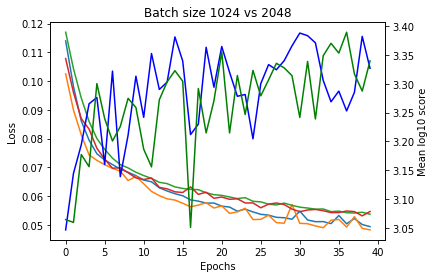

In [11]:
logs0 = np.load('20200120/more_samples_20_200_c64b5_lr0.01.npz', allow_pickle=True)
logs1 = np.load('20200120/ms_bs2048_20_200_c64b5_lr0.01.npz', allow_pickle=True)
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
scores1 = logs1['log_scores']
epochs = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.plot(epochs1, t_loss1, epochs1, v_loss1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.plot(epochs1, scores1, color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.title('Batch size 1024 vs 2048')
plt.show()

Larger batch size not better, but is 10% faster to train.

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 80, 'lr': 0.01, 'batch_size': 2048, 'channels': 64, 'blocks': 5, 'pretrained': None}


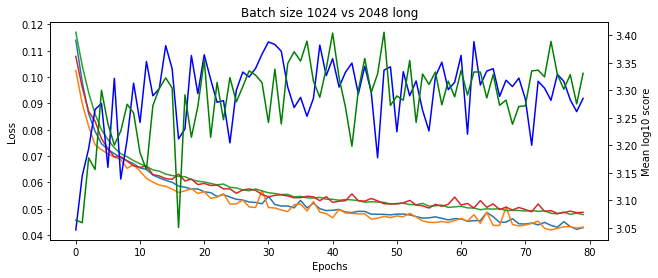

In [19]:
logs0 = np.load('20200120/long_20_200_c64b5_lr0.01.npz', allow_pickle=True)
logs1 = np.load('20200120/long_bs2048_20_200_c64b5_lr0.01.npz', allow_pickle=True)
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
scores1 = logs1['log_scores']
epochs = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.plot(epochs1, t_loss1, epochs1, v_loss1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.plot(epochs1, scores1, color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.title('Batch size 1024 vs 2048 long')
plt.show()

Using 20-epoch variable stopping:
* bs1024: epoch 29 best, stopped at 49
* bs2048: epoch 48 best, stopped at 68

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 100, 'lr': 0.001, 'batch_size': 2048, 'channels': 64, 'blocks': 5, 'pretrained': None}


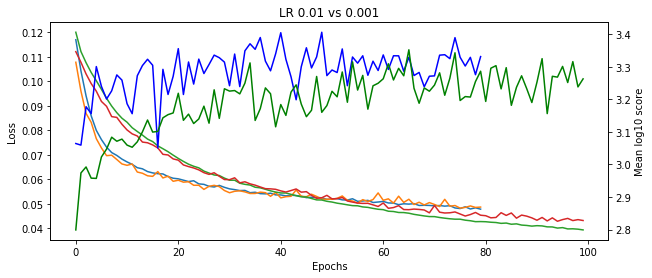

In [5]:
logs0 = np.load('20200120/long_bs2048_20_200_c64b5_lr0.01.npz', allow_pickle=True)
logs1 = np.load('20200121/slow_20_200_c64b5_lr0.001.npz', allow_pickle=True)
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
scores1 = logs1['log_scores']
epochs = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.plot(epochs1, t_loss1, epochs1, v_loss1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.plot(epochs1, scores1, color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.title('LR 0.01 vs 0.001')
plt.show()

Using a smaller LR (with Adam) actually gave lower loss at later epochs. However, playing strength is clearly a bit weaker.

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 60, 'lr': 0.01, 'batch_size': 2048, 'channels': 64, 'blocks': 5, 'pretrained': None}


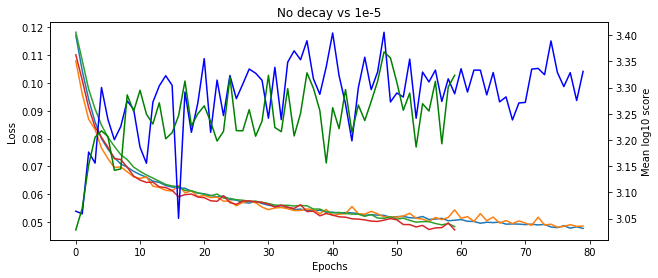

In [8]:
logs0 = np.load('20200120/long_bs2048_20_200_c64b5_lr0.01.npz', allow_pickle=True)
logs1 = np.load('20200121/d1e-5_20_200_c64b5_lr0.01.npz', allow_pickle=True)
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
scores1 = logs1['log_scores']
epochs = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.plot(epochs1, t_loss1, epochs1, v_loss1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.plot(epochs1, scores1, color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.title('No decay vs 1e-5')
plt.show()

Adding weight decay makes strength slightly worse.

Namespace(batch_size=2048, blocks=5, channels=64, decay=0.0, epochs=100, lr=0.01, name='', path='selfplay/fixed/fixed', patience=20, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


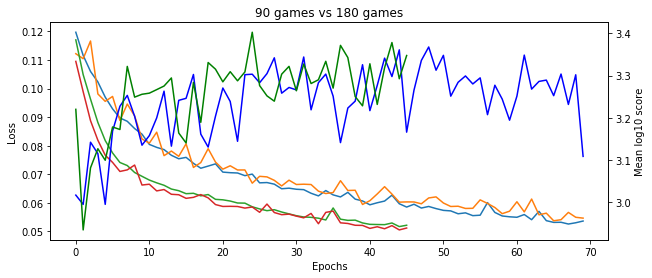

In [4]:
logs0 = np.load('20200121/10_100_c64b5_p20_bs2048lr0.01d0.0_s0.npz', allow_pickle=True)
logs1 = np.load('20200121/20_200_c64b5_p20_bs2048lr0.01d0.0_s0.npz', allow_pickle=True)
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['log_scores']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
scores1 = logs1['log_scores']
epochs = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()
ax1.plot(epochs, t_loss0, epochs, v_loss0)
ax1.plot(epochs1, t_loss1, epochs1, v_loss1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs, scores0, color='b')
ax2.plot(epochs1, scores1, color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.title('90 games vs 180 games')
plt.show()

More training data leads to lower loss, and a slight increase in strength.